# Mushroom classification project

Practical application of machine learning aimed at distinguishing between edible and poisonous mushrooms based on their characteristics.

Data comes from the UCI Machine Learning Repository: https://archive.ics.uci.edu/ml/datasets/Mushroom.

## Imports, config

In [53]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os, time

from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier

from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, precision_score, recall_score, f1_score
from sklearn.pipeline import Pipeline

sns.set(style = 'darkgrid', palette = 'crest')
palette = sns.color_palette('crest', as_cmap = True)

%matplotlib inline

## Data loading, preprocessing and exploration

In [3]:
path = os.getcwd()

data = pd.read_csv(path + '/data/mushrooms.csv')

In [4]:
data.head()

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,p,x,s,n,t,p,f,c,n,k,...,s,w,w,p,w,o,p,k,s,u
1,e,x,s,y,t,a,f,c,b,k,...,s,w,w,p,w,o,p,n,n,g
2,e,b,s,w,t,l,f,c,b,n,...,s,w,w,p,w,o,p,n,n,m
3,p,x,y,w,t,p,f,c,n,n,...,s,w,w,p,w,o,p,k,s,u
4,e,x,s,g,f,n,f,w,b,k,...,s,w,w,p,w,o,e,n,a,g


The dataset includes descriptions of hypothetical samples corresponding to 23 species of gilled mushrooms in the Agaricus and Lepiota Family. Each species is identified as definitely edible or definitely poisonous. The dataset contains 8124 instances and 23 features, listed below. The target variable is the class of the mushroom, which can be either edible or poisonous.

Attribute Information: (classes: edible=e, poisonous=p)

- `cap-shape`: bell=b,conical=c,convex=x,flat=f, knobbed=k,sunken=s

- `cap-surface`: fibrous=f,grooves=g,scaly=y,smooth=s

- `cap-color`: brown=n,buff=b,cinnamon=c,gray=g,green=r,pink=p,purple=u,red=e,white=w,yellow=y

- `bruises`: bruises=t,no=f

- `odor`: almond=a,anise=l,creosote=c,fishy=y,foul=f,musty=m,none=n,pungent=p,spicy=s

- `gill-attachment`: attached=a,descending=d,free=f,notched=n

- `gill-spacing`: close=c,crowded=w,distant=d

- `gill-size`: broad=b,narrow=n

- `gill-color`: black=k,brown=n,buff=b,chocolate=h,gray=g, green=r,orange=o,pink=p,purple=u,red=e,white=w,yellow=y

- `stalk-shape`: enlarging=e,tapering=t

- `stalk-root`: bulbous=b,club=c,cup=u,equal=e,rhizomorphs=z,rooted=r,missing=?

- `stalk-surface-above-ring`: fibrous=f,scaly=y,silky=k,smooth=s

- `stalk-surface-below-ring`: fibrous=f,scaly=y,silky=k,smooth=s

- `stalk-color-above-ring`: brown=n,buff=b,cinnamon=c,gray=g,orange=o,pink=p,red=e,white=w,yellow=y

- `stalk-color-below-ring`: brown=n,buff=b,cinnamon=c,gray=g,orange=o,pink=p,red=e,white=w,yellow=y

- `veil-type`: partial=p,universal=u

- `veil-color`: brown=n,orange=o,white=w,yellow=y

- `ring-number`: none=n,one=o,two=t

- `ring-type`: cobwebby=c,evanescent=e,flaring=f,large=l,none=n,pendant=p,sheathing=s,zone=z

- `spore-print-color`: black=k,brown=n,buff=b,chocolate=h,green=r,orange=o,purple=u,white=w,yellow=y

- `population`: abundant=a,clustered=c,numerous=n,scattered=s,several=v,solitary=y

- `habitat`: grasses=g,leaves=l,meadows=m,paths=p,urban=u,waste=w,woods=d

In [5]:
data.describe()

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
count,8124,8124,8124,8124,8124,8124,8124,8124,8124,8124,...,8124,8124,8124,8124,8124,8124,8124,8124,8124,8124
unique,2,6,4,10,2,9,2,2,2,12,...,4,9,9,1,4,3,5,9,6,7
top,e,x,y,n,f,n,f,c,b,b,...,s,w,w,p,w,o,p,w,v,d
freq,4208,3656,3244,2284,4748,3528,7914,6812,5612,1728,...,4936,4464,4384,8124,7924,7488,3968,2388,4040,3148


In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8124 entries, 0 to 8123
Data columns (total 23 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   class                     8124 non-null   object
 1   cap-shape                 8124 non-null   object
 2   cap-surface               8124 non-null   object
 3   cap-color                 8124 non-null   object
 4   bruises                   8124 non-null   object
 5   odor                      8124 non-null   object
 6   gill-attachment           8124 non-null   object
 7   gill-spacing              8124 non-null   object
 8   gill-size                 8124 non-null   object
 9   gill-color                8124 non-null   object
 10  stalk-shape               8124 non-null   object
 11  stalk-root                8124 non-null   object
 12  stalk-surface-above-ring  8124 non-null   object
 13  stalk-surface-below-ring  8124 non-null   object
 14  stalk-color-above-ring  

In [7]:
data.isnull().sum()

class                       0
cap-shape                   0
cap-surface                 0
cap-color                   0
bruises                     0
odor                        0
gill-attachment             0
gill-spacing                0
gill-size                   0
gill-color                  0
stalk-shape                 0
stalk-root                  0
stalk-surface-above-ring    0
stalk-surface-below-ring    0
stalk-color-above-ring      0
stalk-color-below-ring      0
veil-type                   0
veil-color                  0
ring-number                 0
ring-type                   0
spore-print-color           0
population                  0
habitat                     0
dtype: int64

The data is already clean and contains no missing values. The target variable is categorical and the features are also categorical. We will use LabelEncoder to transform the target variable into a binary variable and the features into numerical values.

In [10]:
label_encoder = LabelEncoder()

for col in data.columns:
    data[col] = label_encoder.fit_transform(data[col])
    
data.head()


,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,1,5,2,4,1,6,1,0,1,4,...,2,7,7,0,2,1,4,2,3,5
1,0,5,2,9,1,0,1,0,0,4,...,2,7,7,0,2,1,4,3,2,1
2,0,0,2,8,1,3,1,0,0,5,...,2,7,7,0,2,1,4,3,2,3
3,1,5,3,8,1,6,1,0,1,5,...,2,7,7,0,2,1,4,2,3,5
4,0,5,2,3,0,5,1,1,0,4,...,2,7,7,0,2,1,0,3,0,1


# Model comparison

In [11]:
X = data.drop('class', axis = 1)
y = data['class']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

### Random Forest Classifier

In [182]:
n_estimators = np.arange(100, 205, 5)
num_steps = 100
rows = []

for n in n_estimators:
    total_accuracy = 0
    total_time = 0
    
    rfc = RandomForestClassifier(n_estimators=n, random_state=42)
    
    for _ in range(num_steps):
        start_time = time.time()
        
        rfc.fit(X_train, y_train)
        y_pred = rfc.predict(X_test)
        
        end_time = time.time()
        total_time += end_time - start_time
        
        total_accuracy += accuracy_score(y_test, y_pred)
    
    cross_val = cross_val_score(rfc, X, y, cv=5).mean()
    
    avg_accuracy = total_accuracy / num_steps
    avg_time = total_time / num_steps
    
    rows.append({'n_estimators': n, 'accuracy': avg_accuracy, 'cross_val': cross_val, 'time': avg_time})

results_rfc = pd.DataFrame(rows)
results_rfc.set_index('n_estimators', inplace=True)

In [186]:
results_rfc.sort_values('accuracy', ascending=False).head(5)

,accuracy,cross_val,time
n_estimators,,,
100,1.0,0.885364,0.177070
155,1.0,0.900512,0.297448
195,1.0,0.900266,0.406108
190,1.0,0.900512,0.403712
185,1.0,0.900389,0.433511


In [187]:
results_rfc.sort_values('cross_val', ascending=False).head(5)

,accuracy,cross_val,time
n_estimators,,,
180,1.0,0.901374,0.379396
175,1.0,0.901251,0.350376
170,1.0,0.901251,0.323817
160,1.0,0.901251,0.321099
165,1.0,0.900881,0.390270


In [ ]:
results_rfc.sort_values('time', ascending=True).head(10)

,accuracy,cross_val,time
n_estimators,,,
100,1.0,0.885364,0.177070
105,1.0,0.885857,0.196768
110,1.0,0.890044,0.210011
115,1.0,0.890660,0.221288
120,1.0,0.897433,0.222340


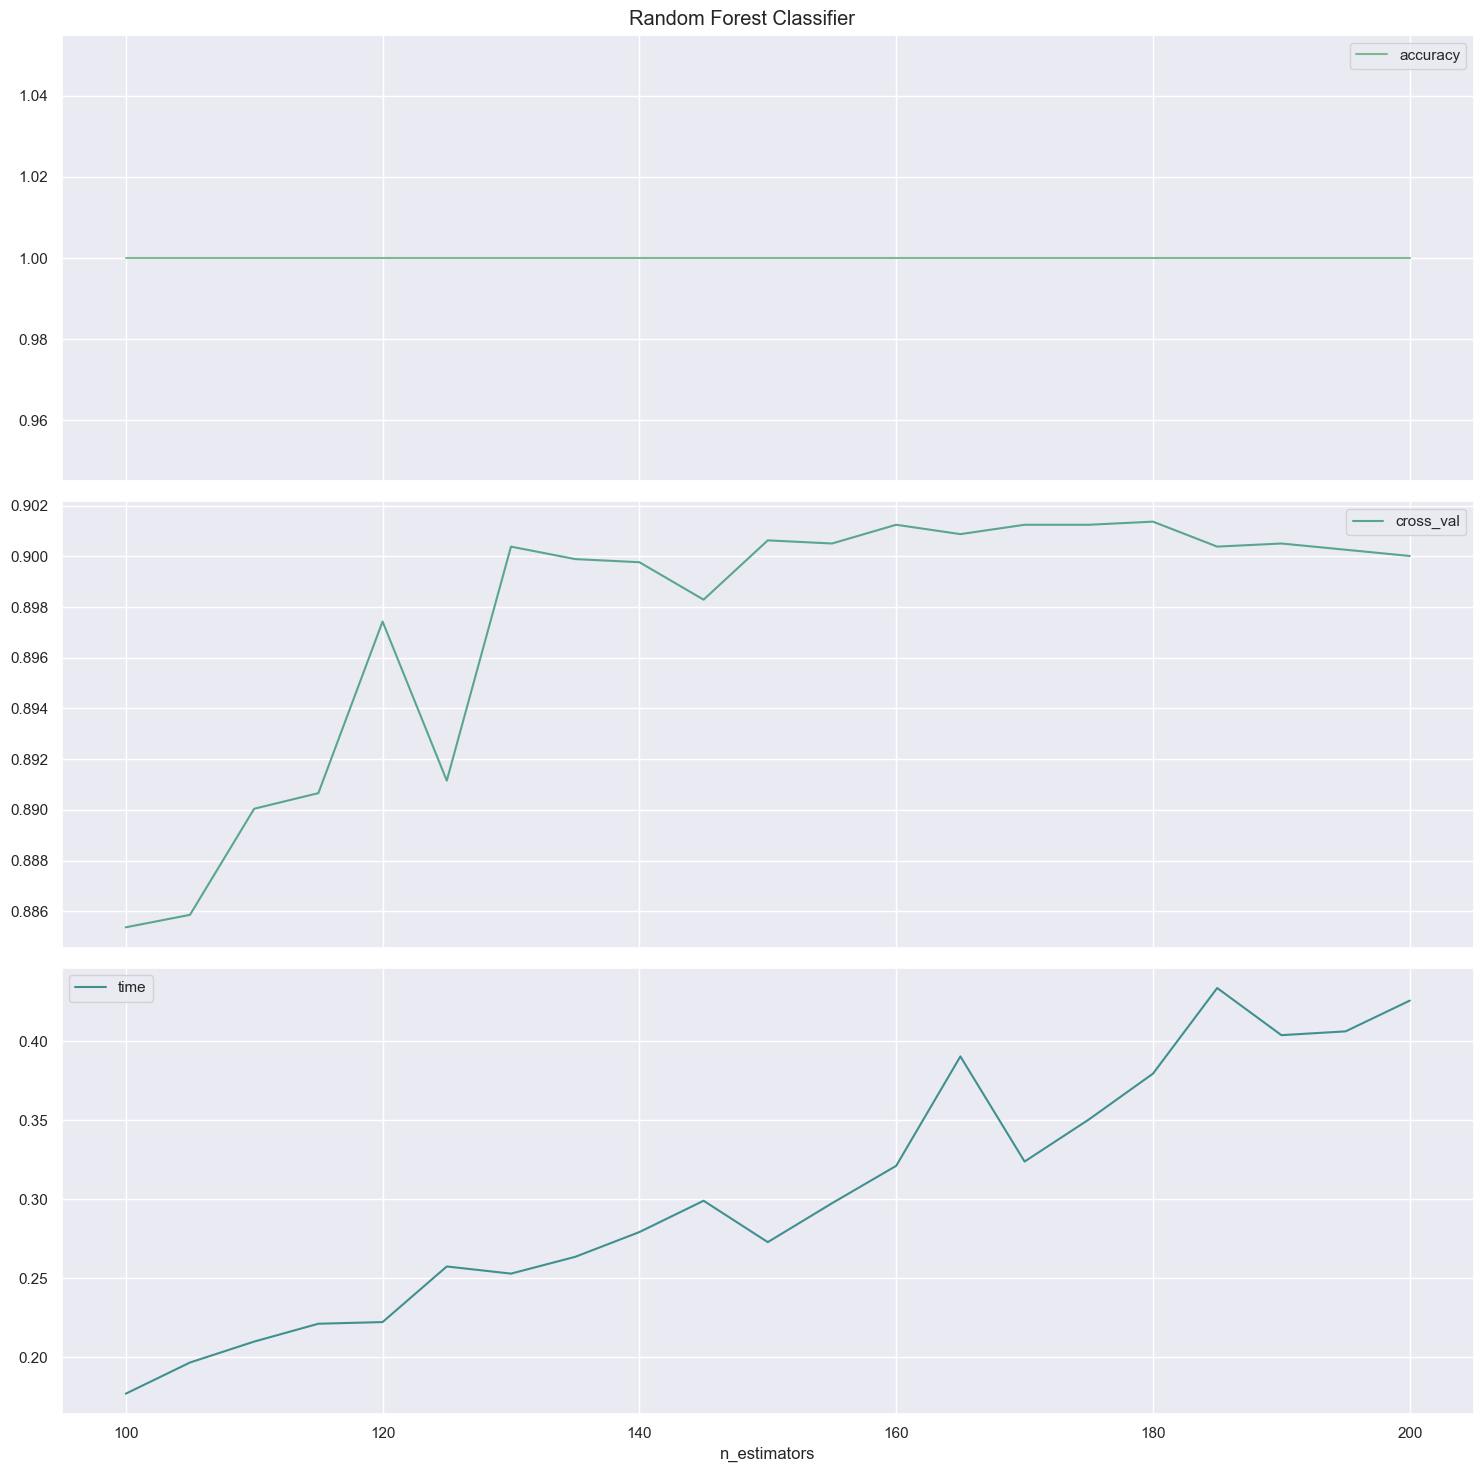

In [208]:
results_rfc.plot(subplots=True, figsize=(15, 15), title='Random Forest Classifier')

plt.tight_layout()

In [19]:
param_grid = {
    'n_estimators': np.arange(100, 205, 5),
    'max_depth': np.arange(5, 15, 1),
    'min_samples_split': np.arange(2, 10, 1),
    'min_samples_leaf': np.arange(1, 5, 1)
}

rfc = RandomForestClassifier(random_state=42)

grid_search_rfc = GridSearchCV(rfc, param_grid, cv=5, n_jobs=-1)

grid_search_rfc.fit(X_train, y_train)

grid_search_rfc.best_params_

{'max_depth': 8,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'n_estimators': 100}

In [38]:
num_steps = 100
total_accuracy = 0
total_time = 0

for _ in range(num_steps):
    start_time = time.time()

    rfc = RandomForestClassifier(n_estimators=grid_search_rfc.best_params_['n_estimators'], max_depth=grid_search_rfc.best_params_['max_depth'], min_samples_split=grid_search_rfc.best_params_['min_samples_split'], min_samples_leaf=grid_search_rfc.best_params_['min_samples_leaf'])
    rfc.fit(X_train, y_train)
    y_pred = rfc.predict(X_test)

    end_time = time.time()

    total_accuracy += accuracy_score(y_test, y_pred)
    total_time += end_time - start_time

avg_time_rfc = total_time / num_steps
avg_accuracy_rfc = total_accuracy / num_steps
cross_val_rfc = cross_val_score(rfc, X, y, cv=5).mean()

print(f'Time: {avg_time_rfc:.3f}s')
print(f'Accuracy: {avg_accuracy_rfc * 100:.2f}%')
print(f'Cross Validation: {cross_val_rfc * 100:.2f}%')

Time: 0.272s
Accuracy: 100.00%
Cross Validation: 89.21%


In [45]:
y_pred = rfc.predict(X_test)

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       843
           1       1.00      1.00      1.00       782

    accuracy                           1.00      1625
   macro avg       1.00      1.00      1.00      1625
weighted avg       1.00      1.00      1.00      1625



### Support Vector Classification

In [193]:
num_steps = 100

total_accuracy = 0
total_time = 0

for _ in range(num_steps):
    start = time.time()

    model = SVC(random_state=42)

    model.fit(X_train, y_train)

    end = time.time()

    y_pred = model.predict(X_test)

    total_time += end - start

    total_accuracy += accuracy_score(y_test, y_pred)

avg_time = total_time / num_steps
avg_accuracy = total_accuracy / num_steps

print(f'Accuracy: {avg_accuracy * 100:.2f}%')

cross_val = cross_val_score(model, X, y, cv=5)

print(f'Cross Validation Score: {cross_val.mean() * 100:.2f}%')

print(f'Time: {end - start:.3f}s')

Accuracy: 99.26%
Cross Validation Score: 84.13%
Time: 0.252s


In [16]:
param_grid_svm = {
    'C': [0.1, 1, 10, 100],
    'gamma': [1, 0.1, 0.01, 0.001],
    'kernel': ['rbf', 'poly', 'sigmoid']
}

grid_search_svm = GridSearchCV(SVC(), param_grid_svm, cv=5, n_jobs=-1)

grid_search_svm.fit(X_train, y_train)

grid_search_svm.best_params_

{'C': 0.1, 'gamma': 1, 'kernel': 'poly'}

In [46]:
num_steps = 100

total_accuracy = 0
total_time = 0

for _ in range(num_steps):
    start = time.time()

    svm = SVC(C=grid_search_svm.best_params_['C'], gamma=grid_search_svm.best_params_['gamma'], kernel=grid_search_svm.best_params_['kernel'])

    svm.fit(X_train, y_train)

    end = time.time()

    y_pred = svm.predict(X_test)

    total_time += end - start

    total_accuracy += accuracy_score(y_test, y_pred)
    
avg_time_svm = total_time / num_steps
avg_accuracy_svm = total_accuracy / num_steps
cross_val_svm = cross_val_score(model, X, y, cv=5).mean()

print(f'Time: {avg_time_svm:.3f}s')
print(f'Accuracy: {avg_accuracy_svm * 100:.2f}%')
print(f'Cross Validation: {cross_val_svm * 100:.2f}%')


Time: 0.202s
Accuracy: 100.00%
Cross Validation: 88.13%


In [47]:
y_pred = svm.predict(X_test)

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       843
           1       1.00      1.00      1.00       782

    accuracy                           1.00      1625
   macro avg       1.00      1.00      1.00      1625
weighted avg       1.00      1.00      1.00      1625



### K-Nearest Neighbors

In [201]:
n_neighbors = np.arange(1, 20)

rows = []

for n in n_neighbors:
    total_accuracy = 0
    total_time = 0
    
    knn = KNeighborsClassifier(n_neighbors=n)
    
    for _ in range(num_steps):
        start_time = time.time()
        
        knn.fit(X_train, y_train)
        y_pred = knn.predict(X_test)
        
        end_time = time.time()
        total_time += end_time - start_time
        
        total_accuracy += accuracy_score(y_test, y_pred)
    
    cross_val = cross_val_score(knn, X, y, cv=5).mean()
    
    avg_accuracy = total_accuracy / num_steps
    avg_time = total_time / num_steps
    
    rows.append({'n_neighbors': n, 'accuracy': avg_accuracy, 'cross_val': cross_val, 'time': avg_time})
    
results_knn = pd.DataFrame(rows)
results_knn.set_index('n_neighbors', inplace=True, drop=True)

In [202]:
results_knn.sort_values('accuracy', ascending=False).head(5)

,accuracy,cross_val,time
n_neighbors,,,
1,0.999385,0.906548,0.163810
2,0.999385,0.897687,0.178556
3,0.998154,0.890172,0.189300
6,0.996923,0.879710,0.242515
4,0.996308,0.882172,0.236177


In [203]:
results_knn.sort_values('cross_val', ascending=False).head(5)

,accuracy,cross_val,time
n_neighbors,,,
1,0.999385,0.906548,0.163810
2,0.999385,0.897687,0.178556
3,0.998154,0.890172,0.189300
9,0.995077,0.884389,0.244329
8,0.995077,0.884267,0.245411


In [204]:
results_knn.sort_values('time', ascending=True).head(5)

,accuracy,cross_val,time
n_neighbors,,,
1,0.999385,0.906548,0.163810
2,0.999385,0.897687,0.178556
3,0.998154,0.890172,0.189300
16,0.993231,0.880575,0.210207
13,0.994462,0.880204,0.210474


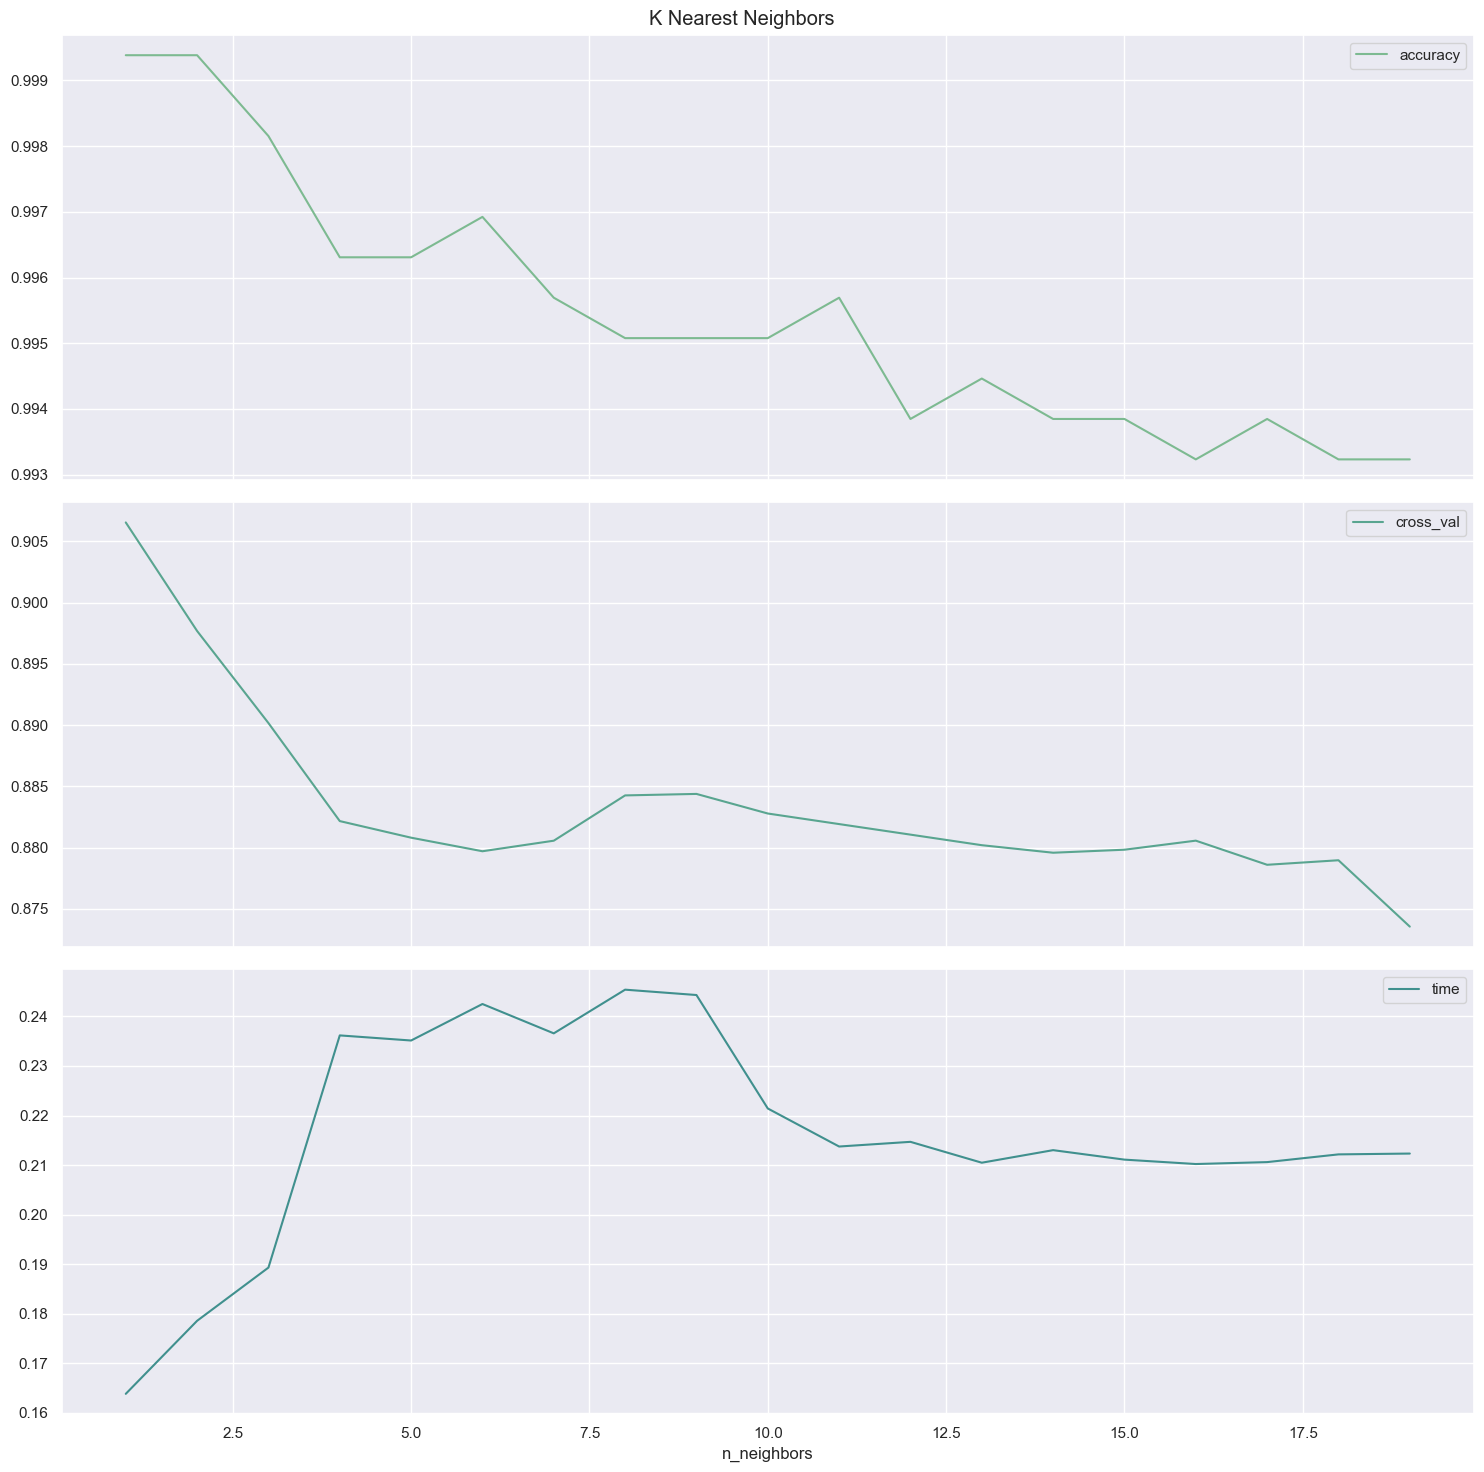

In [207]:
results_knn.plot(subplots=True, figsize=(15, 15), title='K Nearest Neighbors')

plt.tight_layout()

In [13]:
param_grid_knn = {
    'n_neighbors': np.arange(1, 20),
    'weights': ['uniform', 'distance'],
    'algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute']
}

knn = KNeighborsClassifier()

grid_search_knn = GridSearchCV(knn, param_grid_knn, cv=5, n_jobs=-1)

grid_search_knn.fit(X_train, y_train)

grid_search_knn.best_params_

{'algorithm': 'auto', 'n_neighbors': 2, 'weights': 'distance'}

In [39]:
num_steps = 100

total_accuracy = 0
total_time = 0

for _ in range(num_steps):
    start = time.time()

    knn = KNeighborsClassifier(n_neighbors=grid_search_knn.best_params_['n_neighbors'], weights=grid_search_knn.best_params_['weights'], algorithm=grid_search_knn.best_params_['algorithm'])

    knn.fit(X_train, y_train)

    y_pred = knn.predict(X_test)

    end = time.time()

    total_time += end - start
    total_accuracy += accuracy_score(y_test, y_pred)

avg_time_knn = total_time / num_steps
avg_accuracy_knn = total_accuracy / num_steps
cross_val_knn = cross_val_score(knn, X, y, cv=5).mean()

print(f'Time: {avg_time_knn:.3f}s')
print(f'Accuracy: {avg_accuracy_knn * 100:.2f}%')
print(f'Cross Validation: {cross_val_knn * 100:.2f}%')

Time: 0.144s
Accuracy: 99.94%
Cross Validation: 90.61%


In [48]:
y_pred = knn.predict(X_test)

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       843
           1       1.00      1.00      1.00       782

    accuracy                           1.00      1625
   macro avg       1.00      1.00      1.00      1625
weighted avg       1.00      1.00      1.00      1625



## KNN with scaling

In [55]:
n_neighbors = np.arange(1, 20)

rows = []

for n in n_neighbors:
    total_accuracy = 0
    total_time = 0
    
    knn_with_scaling = Pipeline([
        ('scaler', StandardScaler()),
        ('knn', KNeighborsClassifier(n_neighbors=n))
    ])
    
    for _ in range(num_steps):
        start_time = time.time()
        
        knn.fit(X_train, y_train)
        y_pred = knn.predict(X_test)
        
        end_time = time.time()
        total_time += end_time - start_time
        
        total_accuracy += accuracy_score(y_test, y_pred)
        
    cross_val = cross_val_score(knn, X, y, cv=5).mean()
    
    avg_accuracy = total_accuracy / num_steps
    avg_time = total_time / num_steps
    
    rows.append({'n_neighbors': n, 'accuracy': avg_accuracy, 'cross_val': cross_val, 'time': avg_time})

results_knn_with_scaling = pd.DataFrame(rows)

results_knn_with_scaling.set_index('n_neighbors', inplace=True, drop=True)

In [56]:
results_knn_with_scaling.sort_values('accuracy', ascending=False).head(5)

,accuracy,cross_val,time
n_neighbors,,,
1,0.993231,0.873559,0.518770
11,0.993231,0.873559,0.376724
18,0.993231,0.873559,0.506290
17,0.993231,0.873559,0.367179
16,0.993231,0.873559,0.358013


In [57]:
results_knn_with_scaling.sort_values('cross_val', ascending=False).head(5)

,accuracy,cross_val,time
n_neighbors,,,
1,0.993231,0.873559,0.518770
11,0.993231,0.873559,0.376724
18,0.993231,0.873559,0.506290
17,0.993231,0.873559,0.367179
16,0.993231,0.873559,0.358013


In [59]:
results_knn_with_scaling.sort_values('time', ascending=True).head(5)

,accuracy,cross_val,time
n_neighbors,,,
14,0.993231,0.873559,0.327085
12,0.993231,0.873559,0.341461
15,0.993231,0.873559,0.348201
6,0.993231,0.873559,0.354877
13,0.993231,0.873559,0.356660


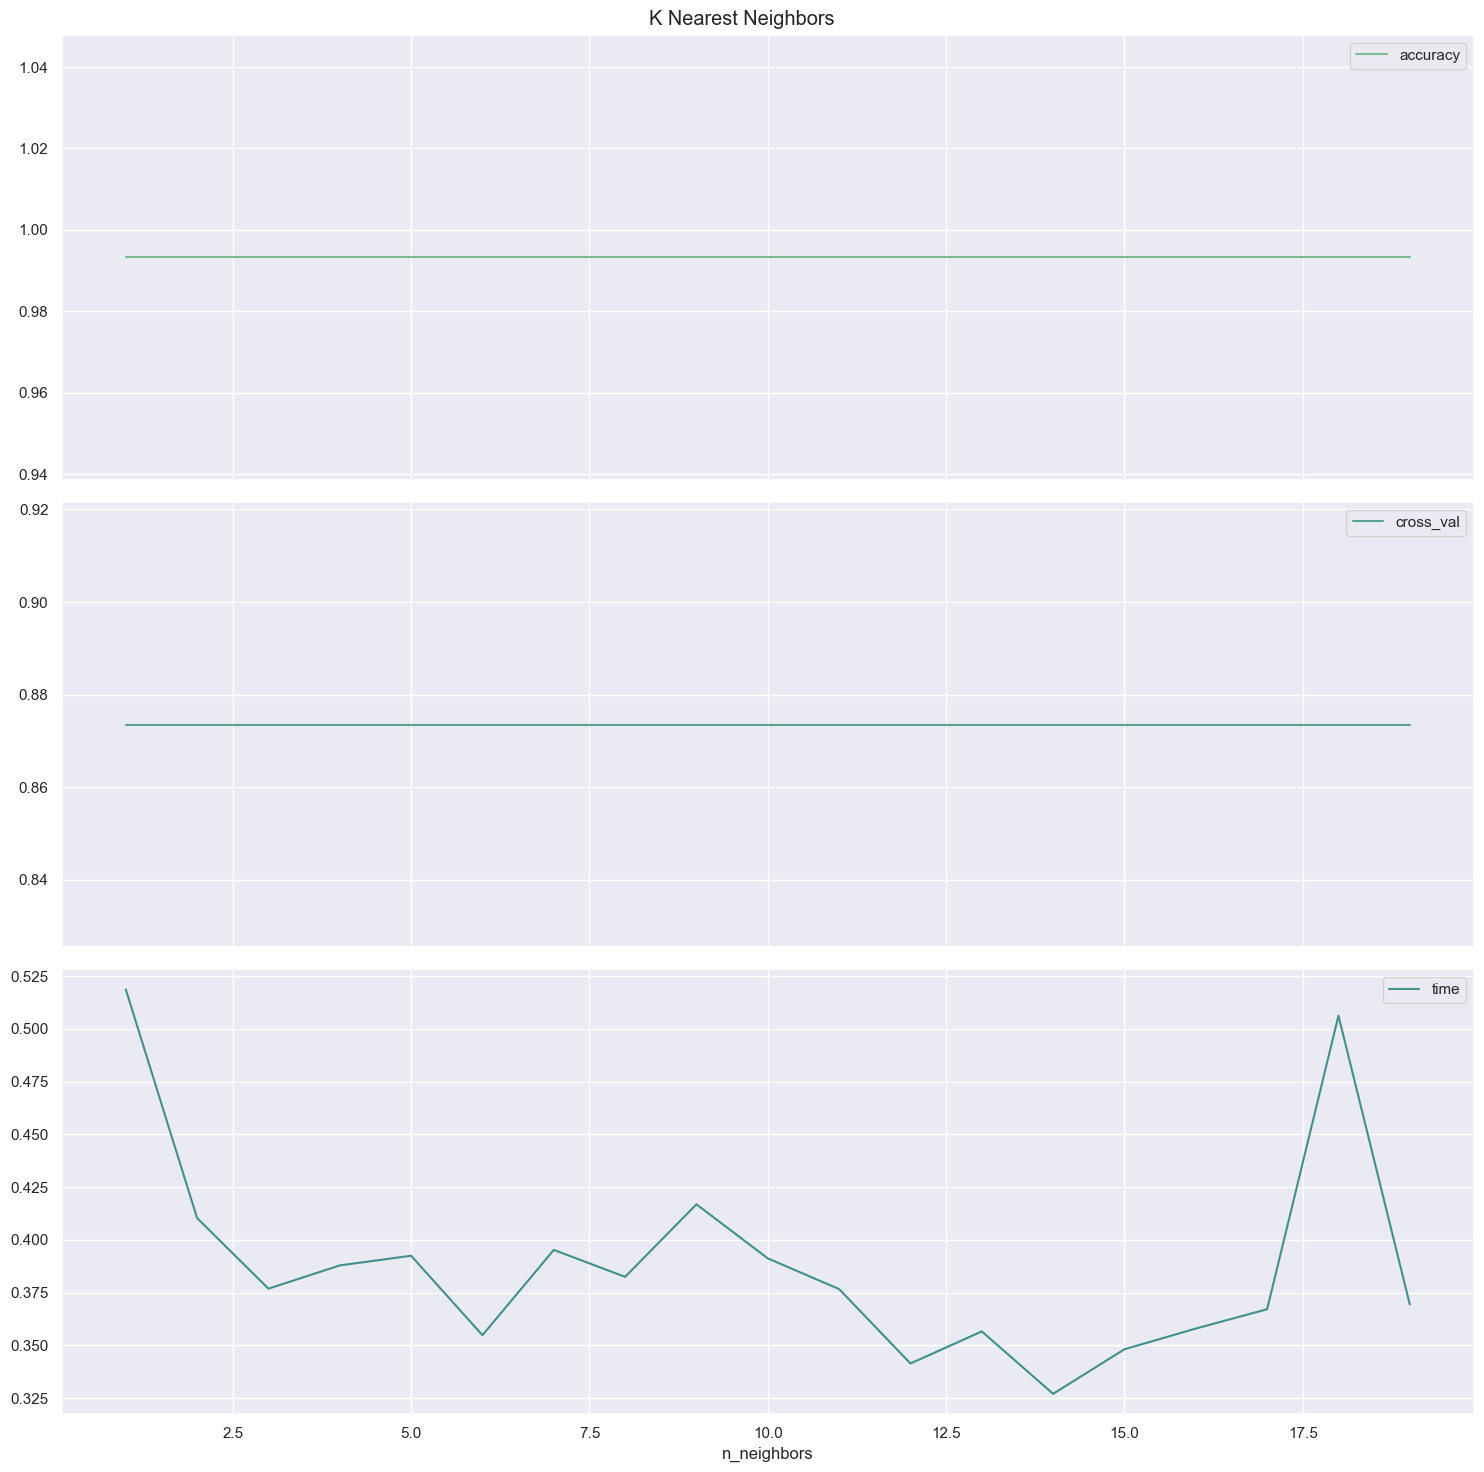

In [60]:
results_knn_with_scaling.plot(subplots=True, figsize=(15, 15), title='K Nearest Neighbors')

plt.tight_layout()

In [62]:
knn_with_scaling= Pipeline([
    ('scaler', StandardScaler()),
    ('knn', KNeighborsClassifier())
])

param_grid_knn_with_scaling = {
    'knn__n_neighbors': np.arange(1, 20),
    'knn__weights': ['uniform', 'distance'],
    'knn__algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute']
}

grid_search_knn_with_scaling = GridSearchCV(knn_with_scaling, param_grid_knn_with_scaling, cv=5, n_jobs=-1)

grid_search_knn_with_scaling.fit(X_train, y_train)

grid_search_knn_with_scaling.best_params_

{'knn__algorithm': 'auto', 'knn__n_neighbors': 1, 'knn__weights': 'uniform'}

In [63]:
num_steps = 100

total_accuracy = 0
total_time = 0

for _ in range(num_steps):
    start = time.time()

    knn_with_scaling = Pipeline([
        ('scaler', StandardScaler()),
        ('knn', KNeighborsClassifier(n_neighbors=grid_search_knn_with_scaling.best_params_['knn__n_neighbors'], weights=grid_search_knn_with_scaling.best_params_['knn__weights'], algorithm=grid_search_knn_with_scaling.best_params_['knn__algorithm']))
    ])

    knn_with_scaling.fit(X_train, y_train)

    y_pred = knn_with_scaling.predict(X_test)

    end = time.time()

    total_time += end - start
    total_accuracy += accuracy_score(y_test, y_pred)

avg_time_knn_with_scaling = total_time / num_steps
avg_accuracy_knn_with_scaling = total_accuracy / num_steps
cross_val_knn_with_scaling = cross_val_score(knn_with_scaling, X, y, cv=5).mean()

print(f'Time: {avg_time_knn_with_scaling:.3f}s')
print(f'Accuracy: {avg_accuracy_knn_with_scaling * 100:.2f}%')
print(f'Cross Validation: {cross_val_knn_with_scaling * 100:.2f}%')

Time: 0.071s
Accuracy: 100.00%
Cross Validation: 89.51%


## Comparison

In [64]:
results_df = pd.DataFrame({'Model': ['Random Forest', 'SVC', 'KNN', 'KNN with Scaling'], 'Accuracy': [avg_accuracy_rfc, avg_accuracy_svm, avg_accuracy_knn, avg_accuracy_knn_with_scaling], 'Cross Validation': [cross_val_rfc, cross_val_svm, cross_val_knn, cross_val_knn_with_scaling], 'Time': [avg_time_rfc, avg_time_svm, avg_time_knn, avg_time_knn_with_scaling]})

results_df.set_index('Model', inplace=True, drop=True)
results_df.style.format({'Accuracy': '{:.2%}', 'Cross Validation': '{:.2%}', 'Time': '{:.3f}s'})


,Accuracy,Cross Validation,Time
Model,,,
Random Forest,100.00%,89.21%,0.272s
SVC,100.00%,88.13%,0.202s
KNN,99.94%,90.61%,0.144s
KNN with Scaling,100.00%,89.51%,0.071s
